<a href="https://colab.research.google.com/github/Dilavarj7/World_Bank_Education_Stats/blob/main/Dilavar_Singh_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
path='/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Day 1/dat/'
EdStatsCountry_Series_df= pd.read_csv(path + 'EdStatsCountry-Series.csv')
EdStatsCountry_df= pd.read_csv(path + 'EdStatsCountry.csv')
EdStatsData_df= pd.read_csv(path + 'EdStatsData.csv')
EdStatsFootNote_df= pd.read_csv(path + 'EdStatsFootNote.csv')
EdStatsSeries_df= pd.read_csv(path + 'EdStatsSeries.csv')

In [11]:
EdStatsCountry_Series_df.head(1)


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [44]:
EdStatsCountry_Series_plot_graph_of_series_code=EdStatsCountry_Series_df['SeriesCode'].value_counts()
EdStatsCountry_Series_plot_graph_of_series_code

Text(0.5, 0, 'Series Code')

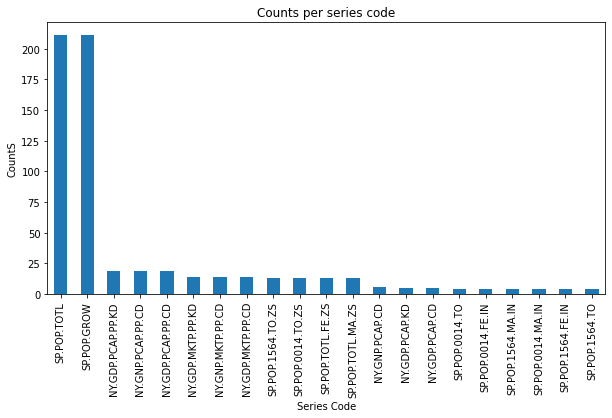

In [46]:
plt.rcParams['figure.figsize'] = (10, 5)
EdStatsCountry_Series_plot_graph_of_series_code.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.CD     19
NY.GDP.MKTP.PP.KD     14
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.TOTL.MA.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.CD         5
SP.POP.0014.TO         4
SP.POP.0014.FE.IN      4
SP.POP.1564.MA.IN      4
SP.POP.0014.MA.IN      4
SP.POP.1564.FE.IN      4
SP.POP.1564.TO         4
Name: SeriesCode, dtype: int64

In [12]:
EdStatsCountry_df.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [14]:
EdStatsData_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
EdStatsFootNote_df.head(1)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN


In [23]:
EdStatsFootNote_df['DESCRIPTION']

0                            Country estimation.
1                            Country estimation.
2                            Country estimation.
3                            Country estimation.
4                            Country estimation.
                           ...                  
643633         Uncertainty bound is 91.6 - 109.3
643634            Uncertainty bound is 54.3 - 76
643635          Uncertainty bound is 48.3 - 73.3
643636    5-year average value between 0s and 5s
643637    5-year average value between 0s and 5s
Name: DESCRIPTION, Length: 643638, dtype: object

In [16]:
EdStatsSeries_df.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Attainment series
att_ser,att_iname=zip(*EdStatsSeries_df[EdStatsSeries_df['Topic']=='Attainment'][['Series Code','Indicator Name']].values)

In [48]:
att_ser

('BAR.NOED.1519.FE.ZS',
 'BAR.NOED.1519.ZS',
 'BAR.NOED.15UP.FE.ZS',
 'BAR.NOED.15UP.ZS',
 'BAR.NOED.2024.FE.ZS',
 'BAR.NOED.2024.ZS',
 'BAR.NOED.2529.FE.ZS',
 'BAR.NOED.2529.ZS',
 'BAR.NOED.25UP.FE.ZS',
 'BAR.NOED.25UP.ZS',
 'BAR.NOED.3034.FE.ZS',
 'BAR.NOED.3034.ZS',
 'BAR.NOED.3539.FE.ZS',
 'BAR.NOED.3539.ZS',
 'BAR.NOED.4044.FE.ZS',
 'BAR.NOED.4044.ZS',
 'BAR.NOED.4549.FE.ZS',
 'BAR.NOED.4549.ZS',
 'BAR.NOED.5054.FE.ZS',
 'BAR.NOED.5054.ZS',
 'BAR.NOED.5559.FE.ZS',
 'BAR.NOED.5559.ZS',
 'BAR.NOED.6064.FE.ZS',
 'BAR.NOED.6064.ZS',
 'BAR.NOED.6569.FE.ZS',
 'BAR.NOED.6569.ZS',
 'BAR.NOED.7074.FE.ZS',
 'BAR.NOED.7074.ZS',
 'BAR.NOED.75UP.FE.ZS',
 'BAR.NOED.75UP.ZS',
 'BAR.POP.1519',
 'BAR.POP.1519.FE',
 'BAR.POP.15UP',
 'BAR.POP.15UP.FE',
 'BAR.POP.2024',
 'BAR.POP.2024.FE',
 'BAR.POP.2529',
 'BAR.POP.2529.FE',
 'BAR.POP.25UP',
 'BAR.POP.25UP.FE',
 'BAR.POP.3034',
 'BAR.POP.3034.FE',
 'BAR.POP.3539',
 'BAR.POP.3539.FE',
 'BAR.POP.4044',
 'BAR.POP.4044.FE',
 'BAR.POP.4549',
 'BAR.POP.45

In [49]:
att_iname

('Barro-Lee: Percentage of female population age 15-19 with no education',
 'Barro-Lee: Percentage of population age 15-19 with no education',
 'Barro-Lee: Percentage of female population age 15+ with no education',
 'Barro-Lee: Percentage of population age 15+ with no education',
 'Barro-Lee: Percentage of female population age 20-24 with no education',
 'Barro-Lee: Percentage of population age 20-24 with no education',
 'Barro-Lee: Percentage of female population age 25-29 with no education',
 'Barro-Lee: Percentage of population age 25-29 with no education',
 'Barro-Lee: Percentage of female population age 25+ with no education',
 'Barro-Lee: Percentage of population age 25+ with no education',
 'Barro-Lee: Percentage of female population age 30-34 with no education',
 'Barro-Lee: Percentage of population age 30-34 with no education',
 'Barro-Lee: Percentage of female population age 35-39 with no education',
 'Barro-Lee: Percentage of population age 35-39 with no education',
 'Barro

In [ ]:
#Series_Code comman in(EdStatsSeries_df,EdStatsFootNote_df)